# ⚽🏆 Who will Win this World Cup 2022?


<img src="https://e0.365dm.com/22/10/1600x900/skysports-world-cup-qatar-2022_5921764.jpg?20221006085810" alt="Alternative text">

In [ ]:
# Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
pio.templates.default = "none"

In [ ]:
wcm = pd.read_csv('/content/world_cup_matches.csv')
im = pd.read_csv('/content/international_matches.csv')
wc = pd.read_csv('/content/world_cups.csv')


In [ ]:
wcg=pd.read_csv('/content/2022_world_cup_groups.csv')
wcmm=pd.read_csv('/content/2022_world_cup_matches.csv')

In [ ]:
wcg.head()

,Group,Team,FIFA Ranking
0,A,Qatar,50
1,A,Ecuador,44
2,A,Senegal,18
3,A,Netherlands,8
4,B,England,5


In [ ]:
wcmm.head()

,ID,Year,Date,Stage,Home Team,Away Team,Host Team
0,1,2022,2022/11/20,Group stage,Qatar,Ecuador,True
1,2,2022,2022/11/21,Group stage,Senegal,Netherlands,False
2,3,2022,2022/11/21,Group stage,England,Iran,False
3,4,2022,2022/11/21,Group stage,United States,Wales,False
4,5,2022,2022/11/22,Group stage,France,Australia,False


In [ ]:
# World Cup Matches
wcm.head()

,ID,Year,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Host Team
0,1,1930,1930/7/13,Group stage,France,4,1,Mexico,France,Mexico,NaN,False
1,2,1930,1930/7/13,Group stage,United States,3,0,Belgium,United States,Belgium,NaN,False
2,3,1930,1930/7/14,Group stage,Yugoslavia,2,1,Brazil,Yugoslavia,Brazil,NaN,False
3,4,1930,1930/7/14,Group stage,Romania,3,1,Peru,Romania,Peru,NaN,False
4,5,1930,1930/7/15,Group stage,Argentina,1,0,France,Argentina,France,NaN,False


In [ ]:
# International Matches
im.head()

,ID,Tournament,Date,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Home Stadium
0,1,Friendly,1872-11-30,Scotland,0,0,England,NaN,NaN,NaN,True
1,2,Friendly,1873-03-08,England,4,2,Scotland,England,Scotland,NaN,True
2,3,Friendly,1874-03-07,Scotland,2,1,England,Scotland,England,NaN,True
3,4,Friendly,1875-03-06,England,2,2,Scotland,NaN,NaN,NaN,True
4,5,Friendly,1876-03-04,Scotland,3,0,England,Scotland,England,NaN,True


In [ ]:
# World Cup Champions
wc

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13,18
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70.0,16,17
2,1938,France,Italy,Hungary,Brazil,Sweden,84.0,15,18
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88.0,13,22
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140.0,16,26
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126.0,16,35
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89.0,16,32
7,1966,England,England,Germany FR,Portugal,Soviet Union,89.0,16,32
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95.0,16,32
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97.0,16,38


In [ ]:
wcm.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)
im.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)
wc.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)

# 🏆 Who were Victorious?
> Analyzed all the championships claimed in previous World Cup tournaments

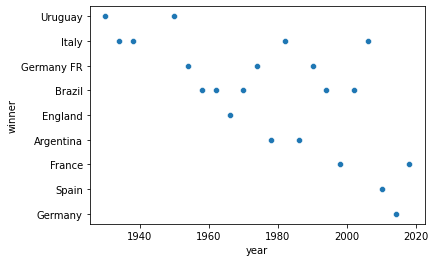

In [ ]:
sns.scatterplot(data=wc, x='year', y='winner')

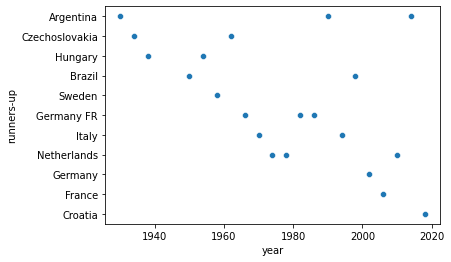

In [ ]:
sns.scatterplot(data=wc, x='year', y='runners-up')

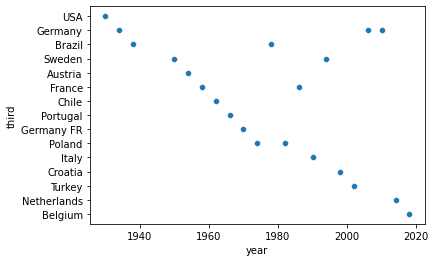

In [ ]:
sns.scatterplot(data=wc, x='year', y='third')

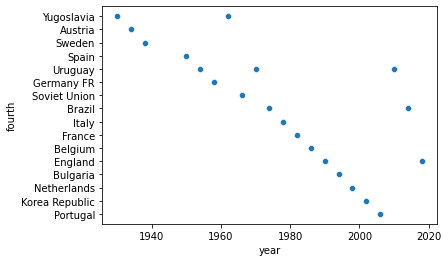

In [ ]:
sns.scatterplot(data=wc, x='year', y='fourth')

> **1st.** Brazil won 5 World Cup titles, 2 Runner-ups, 2 3rd-places, 2 4th-places.

> **2nd.** Italy won 4 World Cup titles, 2 Runner-ups, 1 3rd-place, 1 4th-place.

> **3rd.** Germany won 3 World Cup titles, 3 Runner-ups, 1 4th-place.

# ⚽ Predicting the Winners in Group Stages



In [ ]:
def performance(group):
    # Create empty dataframe
    df = pd.DataFrame()
    
    # Loop through each country in group
    for country in group:
        
        # Return a list of rows where the country has participated in the match
        games_im = len(im[(im.winning_team == country) | (im.losing_team == country)])
        
        # If no games were played by that country, then set inputs as zero
        if games_im == 0:
            wins_im = 0
            losses_im = 0
            winrate_im = 0
            
        # Otherwise, perform the necessary computations
        else:
            wins_im = len(im[im.winning_team == country])
            losses_im = len(im[im.losing_team == country])
            winrate_im = round(wins_im/games_im, 4)

        # Same logic applies C:
        games_wcm = len(wcm[(wcm.winning_team == country) | (wcm.losing_team == country)])
        if games_wcm == 0:
            wins_wcm = 0
            losses_wcm = 0
            winrate_wcm = 0
        else:   
            wins_wcm = len(wcm[wcm.winning_team == country])
            losses_wcm = len(wcm[wcm.losing_team == country])
            winrate_wcm = round(wins_wcm/games_wcm, 4)
 
        # Computing the total win rate 
        winrate = (winrate_im * 0.30) + (winrate_wcm * 0.70)
        
        # Store all the inputs in a list
        list = [country,
                wins_im, losses_im, games_im, winrate_im,
                wins_wcm, losses_wcm, games_wcm, winrate_wcm, winrate]

        # Append/add the list to the DataFrame
        df = df.append(pd.DataFrame([list],
                                    columns = ['country',
                                               'wins_im', 'losses_im', 'games_im', 'winrate_im',
                                               'wins_wcm', 'losses_wcm', 'games_wcm', 'winrate_wcm', 'winrate'],
                                   ))
    
    # Sort DataFrame by order of highest winrate
    return df.sort_values(by = 'winrate', ascending = False)

In [ ]:
group_A = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands']
group_B = ['England', 'Iran', 'United States', 'Wales']
group_C = ['Argentina', 'Saudi Arabia', 'Mexico', 'Poland']
group_D = ['France', 'Australia', 'Denmark', 'Tunisia']
group_E = ['Spain', 'Costa Rica', 'Germany', 'Japan']
group_F = ['Belgium', 'Canada', 'Morocco', 'Croatia']
group_G = ['Brazil', 'Serbia', 'Switzerland', 'Cameroon']
group_H = ['Portugal', 'Ghana', 'Uruguay', 'South Korea']

In [ ]:
performance(group_A)

,country,wins_im,losses_im,games_im,winrate_im,wins_wcm,losses_wcm,games_wcm,winrate_wcm,winrate
0,Netherlands,392,202,594,0.6599,27,11,38,0.7105,0.69532
0,Senegal,256,161,417,0.6139,3,2,5,0.6000,0.60417
0,Ecuador,160,238,398,0.4020,4,5,9,0.4444,0.43168
0,Qatar,235,196,431,0.5452,0,0,0,0.0000,0.16356


In [ ]:
performance(group_B)

,country,wins_im,losses_im,games_im,winrate_im,wins_wcm,losses_wcm,games_wcm,winrate_wcm,winrate
0,England,565,181,746,0.7574,29,19,48,0.6042,0.65016
0,Wales,220,316,536,0.4104,1,1,2,0.5000,0.47312
0,United States,311,234,545,0.5706,8,19,27,0.2963,0.37859
0,Iran,286,91,377,0.7586,2,9,11,0.1818,0.35484


In [ ]:
performance(group_C)

,country,wins_im,losses_im,games_im,winrate_im,wins_wcm,losses_wcm,games_wcm,winrate_wcm,winrate
0,Argentina,503,190,693,0.7258,43,23,66,0.6515,0.67379
0,Poland,348,255,603,0.5771,16,13,29,0.5517,0.55932
0,Mexico,450,215,665,0.6767,16,27,43,0.3721,0.46348
0,Saudi Arabia,310,178,488,0.6352,3,11,14,0.2143,0.34057


In [ ]:
performance(group_D)

,country,wins_im,losses_im,games_im,winrate_im,wins_wcm,losses_wcm,games_wcm,winrate_wcm,winrate
0,France,402,230,632,0.6361,34,19,53,0.6415,0.63988
0,Denmark,370,271,641,0.5772,9,6,15,0.6000,0.59316
0,Australia,267,141,408,0.6544,2,10,12,0.1667,0.31301
0,Tunisia,263,171,434,0.6060,2,9,11,0.1818,0.30906


In [ ]:
performance(group_E)

,country,wins_im,losses_im,games_im,winrate_im,wins_wcm,losses_wcm,games_wcm,winrate_wcm,winrate
0,Germany,505,183,688,0.7340,67,22,89,0.7528,0.74716
0,Spain,394,116,510,0.7725,30,18,48,0.6250,0.66925
0,Costa Rica,273,197,470,0.5809,5,8,13,0.3846,0.44349
0,Japan,322,191,513,0.6277,5,11,16,0.3125,0.40706


In [ ]:
performance(group_F)

,country,wins_im,losses_im,games_im,winrate_im,wins_wcm,losses_wcm,games_wcm,winrate_wcm,winrate
0,Croatia,174,66,240,0.7250,11,8,19,0.5789,0.62273
0,Belgium,334,258,592,0.5642,20,19,39,0.5128,0.52822
0,Morocco,269,128,397,0.6776,2,9,11,0.1818,0.33054
0,Canada,154,164,318,0.4843,0,3,3,0.0000,0.14529


In [ ]:
performance(group_G)

,country,wins_im,losses_im,games_im,winrate_im,wins_wcm,losses_wcm,games_wcm,winrate_wcm,winrate
0,Brazil,578,142,720,0.8028,73,18,91,0.8022,0.80238
0,Switzerland,282,336,618,0.4563,12,17,29,0.4138,0.42655
0,Cameroon,245,134,379,0.6464,4,12,16,0.2500,0.36892
0,Serbia,135,79,214,0.6308,2,7,9,0.2222,0.34478


In [ ]:
performance(group_H)

,country,wins_im,losses_im,games_im,winrate_im,wins_wcm,losses_wcm,games_wcm,winrate_wcm,winrate
0,Portugal,301,169,470,0.6404,14,10,24,0.5833,0.60043
0,Uruguay,375,274,649,0.5778,24,20,44,0.5455,0.55519
0,Ghana,294,161,455,0.6462,4,5,9,0.4444,0.50494
0,South Korea,470,173,643,0.7309,6,19,25,0.2400,0.38727
